In [152]:
#importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [153]:
#read the dataset
file1 = pd.read_excel('file_01_current_supply_network.xlsb', engine = 'pyxlsb')

In [154]:
file1.head()

,supplier_location,customer_location,shipment_size,payment_option,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1


In [155]:
file1.shape

(92851, 6)

In [156]:
file4 = pd.read_excel('file_04_zone_info.xlsb', engine = 'pyxlsb')
file4.head()

,supplier_location,customer_location,shipment_zone
0,facility_06,110001,zone_a
1,facility_06,110001,zone_a
2,facility_06,110001,zone_a
3,facility_06,110001,zone_a
4,facility_06,110001,zone_a


In [157]:
file4 = file4.drop_duplicates()

In [158]:
#merging dataset
merged_df = pd.merge(file1, file4, how = 'left', on = ['supplier_location', 'customer_location'])
merged_df.shape

(92851, 7)

In [159]:
merged_df.to_csv('supply_network.csv')

In [160]:
supply_network = pd.read_csv('supply_network.csv')
supply_network.head()

,Unnamed: 0,supplier_location,customer_location,shipment_size,payment_option,product_quantity,current_logistics_vendor,shipment_zone
0,0,facility_01,201301,small,cod,2156,v1,zone_a
1,1,facility_01,122001,small,cod,1859,v1,zone_a
2,2,facility_01,248001,small,cod,1805,v1,zone_b
3,3,facility_01,201301,small,prepaid,1555,v1,zone_a
4,4,facility_01,800001,small,cod,1508,v1,zone_c


In [161]:
supply_network.drop('Unnamed: 0', axis = 1, inplace = True)

#### Q1. What is the current vendor wise supply volume distributed?

In [162]:
supply_volume = supply_network.groupby('current_logistics_vendor')['product_quantity'].sum()

In [163]:
supply_volume = pd.DataFrame(supply_volume)

In [164]:
supply_volume

,product_quantity
current_logistics_vendor,
v1,3099255
v2,94423
v3,116688
v4,194907


##### vendor wise supply volume with different shipment_size

In [165]:
shipment_wise = pd.DataFrame(supply_network.groupby(['shipment_zone', 'payment_option', 'shipment_size'])['product_quantity'].sum())
shipment_wise

product_quantity
shipment_zone payment_option shipment_size                  
zone_a        cod            large                      2915
                             medium                    72836
                             small                    209766
              prepaid        large                      3062
                             medium                    43040
                             small                    106733
zone_b        cod            large                      3904
                             medium                   234371
                             small                    851645
              prepaid        large                      1476
                             medium                    62354
                             small                    207939
zone_c        cod            large                      1130
                             medium                   174220
                             small                   1210969
              prepaid        large                       862
                             medium                    46608
                             small                    271443

In [166]:
shipment_wise.reset_index(inplace = True)

##### Q2. What is the current vendor wise cost incurred for fulfilling the supply network?

In [167]:
#read the cost_data
cost_data = pd.read_excel('file_02_cost_data.xlsb', engine = 'pyxlsb')

In [168]:
#replacement
cost_data['zone'] = cost_data['zone'].replace('zone_C', 'zone_c')

In [169]:
#segregate the supply network dataset vendors wise
v1 = supply_network[supply_network['current_logistics_vendor'] == 'v1']
v2 = supply_network[supply_network['current_logistics_vendor'] == 'v2']
v3 = supply_network[supply_network['current_logistics_vendor'] == 'v3']
v4 = supply_network[supply_network['current_logistics_vendor'] == 'v4']

In [170]:
#segregate the zone and payment_option wise
v1_zoneA = v1[v1['shipment_zone'] == 'zone_a']
v1_zoneB = v1[v1['shipment_zone'] == 'zone_b']
v1_zoneC = v1[v1['shipment_zone'] == 'zone_c']

v1_zoneA_cod = v1_zoneA[v1_zoneA['payment_option'] == 'cod']
v1_zoneA_pre = v1_zoneA[v1_zoneA['payment_option'] == 'prepaid']
v1_zoneB_cod = v1_zoneB[v1_zoneB['payment_option'] == 'cod']
v1_zoneB_pre = v1_zoneB[v1_zoneB['payment_option'] == 'prepaid']
v1_zoneC_cod = v1_zoneC[v1_zoneC['payment_option'] == 'cod']
v1_zoneC_pre = v1_zoneC[v1_zoneC['payment_option'] == 'prepaid']

In [171]:
#filtered the data based on shipment_size
v1_zoneA_cod_small = v1_zoneA_cod[v1_zoneA_cod['shipment_size'] == 'small']
v1_zoneA_cod_medium = v1_zoneA_cod[v1_zoneA_cod['shipment_size'] == 'medium']
v1_zoneA_cod_large = v1_zoneA_cod[v1_zoneA_cod['shipment_size'] == 'large']
v1_zoneA_pre_small = v1_zoneA_pre[v1_zoneA_pre['shipment_size'] == 'small']
v1_zoneA_pre_medium = v1_zoneA_pre[v1_zoneA_pre['shipment_size'] == 'medium']
v1_zoneA_pre_large = v1_zoneA_pre[v1_zoneA_pre['shipment_size'] == 'large']

#calculation of cost of product_quantity
cost_v1_zoneA_cod_sum = []
cost_v1_zoneA_cod_small = (v1_zoneA_cod_small['product_quantity'].sum()) * 50
cost_v1_zoneA_cod_medium = (v1_zoneA_cod_medium['product_quantity'].sum()) * 210
cost_v1_zoneA_cod_large = (v1_zoneA_cod_large['product_quantity'].sum()) * 740
cost_v1_zoneA_cod_sum.extend((cost_v1_zoneA_cod_small,cost_v1_zoneA_cod_medium,cost_v1_zoneA_cod_large))
cost_v1_zoneA_cod_sum = np.sum(cost_v1_zoneA_cod_sum)
print('cost_of_v1_in_cod_zoneA: %d' % (cost_v1_zoneA_cod_sum))

cost_v1_zoneA_pre_sum = []
cost_v1_zoneA_pre_small = (v1_zoneA_pre_small['product_quantity'].sum()) * 30
cost_v1_zoneA_pre_medium = (v1_zoneA_pre_medium['product_quantity'].sum()) * 190
cost_v1_zoneA_pre_large = (v1_zoneA_pre_large['product_quantity'].sum()) * 720
cost_v1_zoneA_pre_sum.extend((cost_v1_zoneA_pre_small,cost_v1_zoneA_pre_medium,cost_v1_zoneA_pre_large))
cost_v1_zoneA_pre_sum = np.sum(cost_v1_zoneA_pre_sum)
print('cost_of_v1_in_pre_zoneA: %d' % (cost_v1_zoneA_pre_sum))

#cost of vendor 1 in zone-A
cost_v1_zoneA = []
cost_v1_zoneA.extend((cost_v1_zoneA_cod_sum, cost_v1_zoneA_pre_sum))
cost_v1_zoneA = np.sum(cost_v1_zoneA)
print('cost of v1 in zoneA: %d' %(cost_v1_zoneA))

cost_of_v1_in_cod_zoneA: 27655080
cost_of_v1_in_pre_zoneA: 13549090
cost of v1 in zoneA: 41204170


In [172]:
#filtered the zone-B dataset
v1_zoneB_cod_small = v1_zoneB_cod[v1_zoneB_cod['shipment_size'] == 'small']
v1_zoneB_cod_medium = v1_zoneB_cod[v1_zoneB_cod['shipment_size'] == 'medium']
v1_zoneB_cod_large = v1_zoneB_cod[v1_zoneB_cod['shipment_size'] == 'large']
v1_zoneB_pre_small = v1_zoneB_pre[v1_zoneB_pre['shipment_size'] == 'small']
v1_zoneB_pre_medium = v1_zoneB_pre[v1_zoneB_pre['shipment_size'] == 'medium']
v1_zoneB_pre_large = v1_zoneB_pre[v1_zoneB_pre['shipment_size'] == 'large']

#calculation of cost 
cost_v1_zoneB_cod_sum = []
cost_v1_zoneB_cod_small = (v1_zoneB_cod_small['product_quantity'].sum()) * 60
cost_v1_zoneB_cod_medium = (v1_zoneB_cod_medium['product_quantity'].sum()) * 260
cost_v1_zoneB_cod_large = (v1_zoneB_cod_large['product_quantity'].sum()) * 870
cost_v1_zoneB_cod_sum.extend((cost_v1_zoneB_cod_small,cost_v1_zoneB_cod_medium,cost_v1_zoneB_cod_large))
cost_v1_zoneB_cod_sum = np.sum(cost_v1_zoneB_cod_sum)
print('cost_of_v1_in_cod_zoneB: %d' % (cost_v1_zoneB_cod_sum))

cost_v1_zoneB_pre_sum = []
cost_v1_zoneB_pre_small = (v1_zoneB_pre_small['product_quantity'].sum()) * 40
cost_v1_zoneB_pre_medium = (v1_zoneB_pre_medium['product_quantity'].sum()) * 240
cost_v1_zoneB_pre_large = (v1_zoneB_pre_large['product_quantity'].sum()) * 850
cost_v1_zoneB_pre_sum.extend((cost_v1_zoneB_pre_small,cost_v1_zoneB_pre_medium,cost_v1_zoneB_pre_large))
cost_v1_zoneB_pre_sum = np.sum(cost_v1_zoneB_pre_sum)
print('cost_of_v1_in_pre_zoneB: %d' % (cost_v1_zoneB_pre_sum))

#cost of vendor-1 in zone-B
cost_v1_zoneB = []
cost_v1_zoneB.extend((cost_v1_zoneB_cod_sum, cost_v1_zoneB_pre_sum))
cost_v1_zoneB = np.sum(cost_v1_zoneB)
print('cost of v1 in zoneB: %d' %(cost_v1_zoneB))

cost_of_v1_in_cod_zoneB: 99256990
cost_of_v1_in_pre_zoneB: 22760980
cost of v1 in zoneB: 122017970


In [173]:
#filtered the zone-C dataset based on shipment_size
v1_zoneC_cod_small = v1_zoneC_cod[v1_zoneC_cod['shipment_size'] == 'small']
v1_zoneC_cod_medium = v1_zoneC_cod[v1_zoneC_cod['shipment_size'] == 'medium']
v1_zoneC_cod_large = v1_zoneC_cod[v1_zoneC_cod['shipment_size'] == 'large']
v1_zoneC_pre_small = v1_zoneC_pre[v1_zoneC_pre['shipment_size'] == 'small']
v1_zoneC_pre_medium = v1_zoneC_pre[v1_zoneC_pre['shipment_size'] == 'medium']
v1_zoneC_pre_large = v1_zoneC_pre[v1_zoneC_pre['shipment_size'] == 'large']

cost_v1_zoneC_cod_sum = []
cost_v1_zoneC_cod_small = (v1_zoneC_cod_small['product_quantity'].sum()) * 90
cost_v1_zoneC_cod_medium = (v1_zoneC_cod_medium['product_quantity'].sum()) * 480
cost_v1_zoneC_cod_large = (v1_zoneC_cod_large['product_quantity'].sum()) * 1480
cost_v1_zoneC_cod_sum.extend((cost_v1_zoneC_cod_small,cost_v1_zoneC_cod_medium,cost_v1_zoneC_cod_large))
cost_v1_zoneC_cod_sum = np.sum(cost_v1_zoneC_cod_sum)
print('cost_of_v1_in_cod_zoneC: %d' % (cost_v1_zoneC_cod_sum))


cost_v1_zoneC_pre_sum = []
cost_v1_zoneC_pre_small = (v1_zoneC_pre_small['product_quantity'].sum()) * 60
cost_v1_zoneC_pre_medium = (v1_zoneC_pre_medium['product_quantity'].sum()) * 450
cost_v1_zoneC_pre_large = (v1_zoneC_pre_large['product_quantity'].sum()) * 1450
cost_v1_zoneC_pre_sum.extend((cost_v1_zoneC_pre_small,cost_v1_zoneC_pre_medium,cost_v1_zoneC_pre_large))
cost_v1_zoneC_pre_sum = np.sum(cost_v1_zoneC_pre_sum)
print('cost_of_v1_in_pre_zoneC: %d' % (cost_v1_zoneC_pre_sum))

#cost of vendor-1 in zone-C
cost_v1_zoneC = []
cost_v1_zoneC.extend((cost_v1_zoneC_cod_sum, cost_v1_zoneC_pre_sum))
cost_v1_zoneC = np.sum(cost_v1_zoneC)
print('cost of v1 in zoneC: %d' %(cost_v1_zoneC))

cost_of_v1_in_cod_zoneC: 170178420
cost_of_v1_in_pre_zoneC: 36637480
cost of v1 in zoneC: 206815900


In [174]:
#total cost of vendor-1 in all zones
cost_v1 = []
cost_v1.extend((cost_v1_zoneA, cost_v1_zoneB, cost_v1_zoneC))
cost_v1 = np.sum(cost_v1)
print('Total cost of v1 incurred for fulfilling the supply requirement: %d INR' % (cost_v1))

Total cost of v1 incurred for fulfilling the supply requirement: 370038040 INR


In [175]:
#similar calculations for vendor-2
v2_zoneA = v2[v2['shipment_zone'] == 'zone_a']
v2_zoneB = v2[v2['shipment_zone'] == 'zone_b']
v2_zoneC = v2[v2['shipment_zone'] == 'zone_c']

v2_zoneA_cod = v2_zoneA[v2_zoneA['payment_option'] == 'cod']
v2_zoneA_pre = v2_zoneA[v2_zoneA['payment_option'] == 'prepaid']
v2_zoneB_cod = v2_zoneB[v2_zoneB['payment_option'] == 'cod']
v2_zoneB_pre = v2_zoneB[v2_zoneB['payment_option'] == 'prepaid']
v2_zoneC_cod = v2_zoneC[v2_zoneC['payment_option'] == 'cod']
v2_zoneC_pre = v2_zoneC[v2_zoneC['payment_option'] == 'prepaid']

In [176]:
v2_zoneA_cod_small = v2_zoneA_cod[v2_zoneA_cod['shipment_size'] == 'small']
v2_zoneA_cod_medium = v2_zoneA_cod[v2_zoneA_cod['shipment_size'] == 'medium']
v2_zoneA_cod_large = v2_zoneA_cod[v2_zoneA_cod['shipment_size'] == 'large']
v2_zoneA_pre_small = v2_zoneA_pre[v2_zoneA_pre['shipment_size'] == 'small']
v2_zoneA_pre_medium = v2_zoneA_pre[v2_zoneA_pre['shipment_size'] == 'medium']
v2_zoneA_pre_large = v2_zoneA_pre[v2_zoneA_pre['shipment_size'] == 'large']

cost_v2_zoneA_cod_sum = []
cost_v2_zoneA_cod_small = (v2_zoneA_cod_small['product_quantity'].sum()) * 90
cost_v2_zoneA_cod_medium = (v2_zoneA_cod_medium['product_quantity'].sum()) * 310
cost_v2_zoneA_cod_large = (v2_zoneA_cod_large['product_quantity'].sum()) * 780
cost_v2_zoneA_cod_sum.extend((cost_v2_zoneA_cod_small,cost_v2_zoneA_cod_medium,cost_v2_zoneA_cod_large))
cost_v2_zoneA_cod_sum = np.sum(cost_v2_zoneA_cod_sum)
print('cost_of_v2_in_cod_zoneA: %d' % (cost_v2_zoneA_cod_sum))

cost_v2_zoneA_pre_sum = []
cost_v2_zoneA_pre_small = (v2_zoneA_pre_small['product_quantity'].sum()) * 30
cost_v2_zoneA_pre_medium = (v2_zoneA_pre_medium['product_quantity'].sum()) * 260
cost_v2_zoneA_pre_large = (v2_zoneA_pre_large['product_quantity'].sum()) * 730
cost_v2_zoneA_pre_sum.extend((cost_v2_zoneA_pre_small,cost_v2_zoneA_pre_medium,cost_v2_zoneA_pre_large))
cost_v2_zoneA_pre_sum = np.sum(cost_v2_zoneA_pre_sum)
print('cost_of_v2_in_pre_zoneA: %d' % (cost_v2_zoneA_pre_sum))

#cost of vendor-2 in zone-A
cost_v2_zoneA = []
cost_v2_zoneA.extend((cost_v2_zoneA_cod_sum, cost_v2_zoneA_pre_sum))
cost_v2_zoneA = np.sum(cost_v2_zoneA)
print('cost of v2 in zoneA: %d' %(cost_v2_zoneA))

cost_of_v2_in_cod_zoneA: 129960
cost_of_v2_in_pre_zoneA: 16410
cost of v2 in zoneA: 146370


In [177]:
v2_zoneB_cod_small = v2_zoneB_cod[v2_zoneB_cod['shipment_size'] == 'small']
v2_zoneB_cod_medium = v2_zoneB_cod[v2_zoneB_cod['shipment_size'] == 'medium']
v2_zoneB_cod_large = v2_zoneB_cod[v2_zoneB_cod['shipment_size'] == 'large']
v2_zoneB_pre_small = v2_zoneB_pre[v2_zoneB_pre['shipment_size'] == 'small']
v2_zoneB_pre_medium = v2_zoneB_pre[v2_zoneB_pre['shipment_size'] == 'medium']
v2_zoneB_pre_large = v2_zoneB_pre[v2_zoneB_pre['shipment_size'] == 'large']

cost_v2_zoneB_cod_sum = []
cost_v2_zoneB_cod_small = (v2_zoneB_cod_small['product_quantity'].sum()) * 90
cost_v2_zoneB_cod_medium = (v2_zoneB_cod_medium['product_quantity'].sum()) * 340
cost_v2_zoneB_cod_large = (v2_zoneB_cod_large['product_quantity'].sum()) * 860
cost_v2_zoneB_cod_sum.extend((cost_v2_zoneB_cod_small,cost_v2_zoneB_cod_medium,cost_v2_zoneB_cod_large))
cost_v2_zoneB_cod_sum = np.sum(cost_v2_zoneB_cod_sum)
print('cost_of_v2_in_cod_zoneB: %d' % (cost_v2_zoneB_cod_sum))

cost_v2_zoneB_pre_sum = []
cost_v2_zoneB_pre_small = (v2_zoneB_pre_small['product_quantity'].sum()) * 40
cost_v2_zoneB_pre_medium = (v2_zoneB_pre_medium['product_quantity'].sum()) * 290
cost_v2_zoneB_pre_large = (v2_zoneB_pre_large['product_quantity'].sum()) * 800
cost_v2_zoneB_pre_sum.extend((cost_v2_zoneB_pre_small,cost_v2_zoneB_pre_medium,cost_v2_zoneB_pre_large))
cost_v2_zoneB_pre_sum = np.sum(cost_v2_zoneB_pre_sum)
print('cost_of_v2_in_pre_zoneB: %d' % (cost_v2_zoneB_pre_sum))

#cost of vendor-2 in zone-B
cost_v2_zoneB = []
cost_v2_zoneB.extend((cost_v2_zoneB_cod_sum, cost_v2_zoneB_pre_sum))
cost_v2_zoneB = np.sum(cost_v2_zoneB)
print('cost of v2 in zoneB: %d' %(cost_v2_zoneB))

cost_of_v2_in_cod_zoneB: 4261040
cost_of_v2_in_pre_zoneB: 279780
cost of v2 in zoneB: 4540820


In [178]:
v2_zoneC_cod_small = v2_zoneC_cod[v2_zoneC_cod['shipment_size'] == 'small']
v2_zoneC_cod_medium = v2_zoneC_cod[v2_zoneC_cod['shipment_size'] == 'medium']
v2_zoneC_cod_large = v2_zoneC_cod[v2_zoneC_cod['shipment_size'] == 'large']
v2_zoneC_pre_small = v2_zoneC_pre[v2_zoneC_pre['shipment_size'] == 'small']
v2_zoneC_pre_medium = v2_zoneC_pre[v2_zoneC_pre['shipment_size'] == 'medium']
v2_zoneC_pre_large = v2_zoneC_pre[v2_zoneC_pre['shipment_size'] == 'large']

cost_v2_zoneC_cod_sum = []
cost_v2_zoneC_cod_small = (v2_zoneC_cod_small['product_quantity'].sum()) * 120
cost_v2_zoneC_cod_medium = (v2_zoneC_cod_medium['product_quantity'].sum()) * 560
cost_v2_zoneC_cod_large = (v2_zoneC_cod_large['product_quantity'].sum()) * 1480
cost_v2_zoneC_cod_sum.extend((cost_v2_zoneC_cod_small,cost_v2_zoneC_cod_medium,cost_v2_zoneC_cod_large))
cost_v2_zoneC_cod_sum = np.sum(cost_v2_zoneC_cod_sum)
print('cost_of_v2_in_cod_zoneC: %d' % (cost_v2_zoneC_cod_sum))

cost_v2_zoneC_pre_sum = []
cost_v2_zoneC_pre_small = (v2_zoneC_pre_small['product_quantity'].sum()) * 70
cost_v2_zoneC_pre_medium = (v2_zoneC_pre_medium['product_quantity'].sum()) * 510
cost_v2_zoneC_pre_large = (v2_zoneC_pre_large['product_quantity'].sum()) * 1430
cost_v2_zoneC_pre_sum.extend((cost_v2_zoneC_pre_small,cost_v2_zoneC_pre_medium,cost_v2_zoneC_pre_large))
cost_v2_zoneC_pre_sum = np.sum(cost_v2_zoneC_pre_sum)
print('cost_of_v2_in_pre_zoneC: %d' % (cost_v2_zoneC_pre_sum))

#cost of vendor-2 in zone-C
cost_v2_zoneC = []
cost_v2_zoneC.extend((cost_v2_zoneC_cod_sum, cost_v2_zoneC_pre_sum))
cost_v2_zoneC = np.sum(cost_v2_zoneC)
print('cost of v2 in zoneC: %d' %(cost_v2_zoneC))

cost_of_v2_in_cod_zoneC: 7151120
cost_of_v2_in_pre_zoneC: 438230
cost of v2 in zoneC: 7589350


In [179]:
#total cost of vendor-2 in all zones
cost_v2 = []
cost_v2.extend((cost_v2_zoneA, cost_v2_zoneB, cost_v2_zoneC))
cost_v2 = np.sum(cost_v2)
print('Total cost of v2 incurred for fulfilling the supply requirement: %d INR' % (cost_v2))

Total cost of v2 incurred for fulfilling the supply requirement: 12276540 INR


In [180]:
#similar calcualtions for vendor-3
v3_zoneA = v3[v3['shipment_zone'] == 'zone_a']
v3_zoneB = v3[v3['shipment_zone'] == 'zone_b']
v3_zoneC = v3[v3['shipment_zone'] == 'zone_c']

v3_zoneA_cod = v3_zoneA[v3_zoneA['payment_option'] == 'cod']
v3_zoneA_pre = v3_zoneA[v3_zoneA['payment_option'] == 'prepaid']
v3_zoneB_cod = v3_zoneB[v3_zoneB['payment_option'] == 'cod']
v3_zoneB_pre = v3_zoneB[v3_zoneB['payment_option'] == 'prepaid']
v3_zoneC_cod = v3_zoneC[v3_zoneC['payment_option'] == 'cod']
v3_zoneC_pre = v3_zoneC[v3_zoneC['payment_option'] == 'prepaid']

In [181]:
v3_zoneA_cod_small = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'small']
v3_zoneA_cod_medium = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'medium']
v3_zoneA_cod_large = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'large']
v3_zoneA_pre_small = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'small']
v3_zoneA_pre_medium = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'medium']
v3_zoneA_pre_large = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'large']

cost_v3_zoneA_cod_sum = []
cost_v3_zoneA_cod_small = (v3_zoneA_cod_small['product_quantity'].sum()) * 50
cost_v3_zoneA_cod_medium = (v3_zoneA_cod_medium['product_quantity'].sum()) * 160
cost_v3_zoneA_cod_large = (v3_zoneA_cod_large['product_quantity'].sum()) * 380
cost_v3_zoneA_cod_sum.extend((cost_v3_zoneA_cod_small,cost_v3_zoneA_cod_medium,cost_v3_zoneA_cod_large))
cost_v3_zoneA_cod_sum = np.sum(cost_v3_zoneA_cod_sum)
print('cost_of_v3_in_cod_zoneA: %d' % (cost_v3_zoneA_cod_sum))

cost_v3_zoneA_pre_sum = []
cost_v3_zoneA_pre_small = (v3_zoneA_pre_small['product_quantity'].sum()) * 30
cost_v3_zoneA_pre_medium = (v3_zoneA_pre_medium['product_quantity'].sum()) * 130
cost_v3_zoneA_pre_large = (v3_zoneA_pre_large['product_quantity'].sum()) * 360
cost_v3_zoneA_pre_sum.extend((cost_v3_zoneA_pre_small,cost_v3_zoneA_pre_medium,cost_v3_zoneA_pre_large))
cost_v3_zoneA_pre_sum = np.sum(cost_v3_zoneA_pre_sum)
print('cost_of_v3_in_pre_zoneA: %d' % (cost_v3_zoneA_pre_sum))

#cost of vendor-3 in zone-A
cost_v3_zoneA = []
cost_v3_zoneA.extend((cost_v3_zoneA_cod_sum, cost_v3_zoneA_pre_sum))
cost_v3_zoneA = np.sum(cost_v3_zoneA)
print('cost of v3 in zoneA: %d' %(cost_v3_zoneA))

cost_of_v3_in_cod_zoneA: 56910
cost_of_v3_in_pre_zoneA: 4980
cost of v3 in zoneA: 61890


In [182]:
v3_zoneB_cod_small = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'small']
v3_zoneB_cod_medium = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'medium']
v3_zoneB_cod_large = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'large']
v3_zoneB_pre_small = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'small']
v3_zoneB_pre_medium = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'medium']
v3_zoneB_pre_large = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'large']

cost_v3_zoneB_cod_sum = []
cost_v3_zoneB_cod_small = (v3_zoneB_cod_small['product_quantity'].sum()) * 60
cost_v3_zoneB_cod_medium = (v3_zoneB_cod_medium['product_quantity'].sum()) * 190
cost_v3_zoneB_cod_large = (v3_zoneB_cod_large['product_quantity'].sum()) * 480
cost_v3_zoneB_cod_sum.extend((cost_v3_zoneB_cod_small,cost_v3_zoneB_cod_medium,cost_v3_zoneB_cod_large))
cost_v3_zoneB_cod_sum = np.sum(cost_v3_zoneB_cod_sum)
print('cost_of_v3_in_cod_zoneB: %d' % (cost_v3_zoneB_cod_sum))

cost_v3_zoneB_pre_sum = []
cost_v3_zoneB_pre_small = (v3_zoneB_pre_small['product_quantity'].sum()) * 30
cost_v3_zoneB_pre_medium = (v3_zoneB_pre_medium['product_quantity'].sum()) * 170
cost_v3_zoneB_pre_large = (v3_zoneB_pre_large['product_quantity'].sum()) * 460
cost_v3_zoneB_pre_sum.extend((cost_v3_zoneB_pre_small,cost_v3_zoneB_pre_medium,cost_v3_zoneB_pre_large))
cost_v3_zoneB_pre_sum = np.sum(cost_v3_zoneB_pre_sum)
print('cost_of_v3_in_pre_zoneB: %d' % (cost_v3_zoneB_pre_sum))

#cost of vendor-3 in zone-B
cost_v3_zoneB = []
cost_v3_zoneB.extend((cost_v3_zoneB_cod_sum, cost_v3_zoneB_pre_sum))
cost_v3_zoneB = np.sum(cost_v3_zoneB)
print('cost of v3 in zoneB: %d' %(cost_v3_zoneB))

cost_of_v3_in_cod_zoneB: 5013160
cost_of_v3_in_pre_zoneB: 406550
cost of v3 in zoneB: 5419710


In [183]:
v3_zoneC_cod_small = v3_zoneC_cod[v3_zoneC_cod['shipment_size'] == 'small']
v3_zoneC_cod_medium = v3_zoneC_cod[v3_zoneC_cod['shipment_size'] == 'medium']
v3_zoneC_cod_large = v3_zoneC_cod[v3_zoneC_cod['shipment_size'] == 'large']
v3_zoneC_pre_small = v3_zoneC_pre[v3_zoneC_pre['shipment_size'] == 'small']
v3_zoneC_pre_medium = v3_zoneC_pre[v3_zoneC_pre['shipment_size'] == 'medium']
v3_zoneC_pre_large = v3_zoneC_pre[v3_zoneC_pre['shipment_size'] == 'large']

cost_v3_zoneC_cod_sum = []
cost_v3_zoneC_cod_small = (v3_zoneC_cod_small['product_quantity'].sum()) * 80
cost_v3_zoneC_cod_medium = (v3_zoneC_cod_medium['product_quantity'].sum()) * 410
cost_v3_zoneC_cod_large = (v3_zoneC_cod_large['product_quantity'].sum()) * 1100
cost_v3_zoneC_cod_sum.extend((cost_v3_zoneC_cod_small,cost_v3_zoneC_cod_medium,cost_v3_zoneC_cod_large))
cost_v3_zoneC_cod_sum = np.sum(cost_v3_zoneC_cod_sum)
print('cost_of_v3_in_cod_zoneC: %d' % (cost_v3_zoneC_cod_sum))

cost_v3_zoneC_pre_sum = []
cost_v3_zoneC_pre_small = (v3_zoneC_pre_small['product_quantity'].sum()) * 60
cost_v3_zoneC_pre_medium = (v3_zoneC_pre_medium['product_quantity'].sum()) * 380
cost_v3_zoneC_pre_large = (v3_zoneC_pre_large['product_quantity'].sum()) * 1040
cost_v3_zoneC_pre_sum.extend((cost_v3_zoneC_pre_small,cost_v3_zoneC_pre_medium,cost_v3_zoneC_pre_large))
cost_v3_zoneC_pre_sum = np.sum(cost_v3_zoneC_pre_sum)
print('cost_of_v3_in_pre_zoneC: %d' % (cost_v3_zoneC_pre_sum))

#cost of vendor-3 in zone-C
cost_v3_zoneC = []
cost_v3_zoneC.extend((cost_v3_zoneC_cod_sum, cost_v3_zoneC_pre_sum))
cost_v3_zoneC = np.sum(cost_v3_zoneC)
print('cost of v3 in zoneC: %d' %(cost_v3_zoneC))

cost_of_v3_in_cod_zoneC: 6863350
cost_of_v3_in_pre_zoneC: 370980
cost of v3 in zoneC: 7234330


In [184]:
#total cost of vendor-3 in all zones
cost_v3 = []
cost_v3.extend((cost_v3_zoneA, cost_v3_zoneB, cost_v3_zoneC))
cost_v3 = np.sum(cost_v3)
print('Total cost of v3 incurred for fulfilling the supply requirement: %d INR' % (cost_v3))

Total cost of v3 incurred for fulfilling the supply requirement: 12715930 INR


In [185]:
#similar calculations for vendor-4
v4_zoneA = v4[v4['shipment_zone'] == 'zone_a']
v4_zoneB = v4[v4['shipment_zone'] == 'zone_b']
v4_zoneC = v4[v4['shipment_zone'] == 'zone_c']

v4_zoneA_cod = v4_zoneA[v4_zoneA['payment_option'] == 'cod']
v4_zoneA_pre = v4_zoneA[v4_zoneA['payment_option'] == 'prepaid']
v4_zoneB_cod = v4_zoneB[v4_zoneB['payment_option'] == 'cod']
v4_zoneB_pre = v4_zoneB[v4_zoneB['payment_option'] == 'prepaid']
v4_zoneC_cod = v4_zoneC[v4_zoneC['payment_option'] == 'cod']
v4_zoneC_pre = v4_zoneC[v4_zoneC['payment_option'] == 'prepaid']

In [186]:
v4_zoneA_cod_small = v4_zoneA_cod[v4_zoneA_cod['shipment_size'] == 'small']
v4_zoneA_cod_medium = v4_zoneA_cod[v4_zoneA_cod['shipment_size'] == 'medium']
v4_zoneA_cod_large = v4_zoneA_cod[v4_zoneA_cod['shipment_size'] == 'large']
v4_zoneA_pre_small = v4_zoneA_pre[v4_zoneA_pre['shipment_size'] == 'small']
v4_zoneA_pre_medium = v4_zoneA_pre[v4_zoneA_pre['shipment_size'] == 'medium']
v4_zoneA_pre_large = v4_zoneA_pre[v4_zoneA_pre['shipment_size'] == 'large']

cost_v4_zoneA_cod_sum = []
cost_v4_zoneA_cod_small = (v4_zoneA_cod_small['product_quantity'].sum()) * 60
cost_v4_zoneA_cod_medium = (v4_zoneA_cod_medium['product_quantity'].sum()) * 270
cost_v4_zoneA_cod_large = (v4_zoneA_cod_large['product_quantity'].sum()) * 710
cost_v4_zoneA_cod_sum.extend((cost_v4_zoneA_cod_small,cost_v4_zoneA_cod_medium,cost_v4_zoneA_cod_large))
cost_v4_zoneA_cod_sum = np.sum(cost_v4_zoneA_cod_sum)
print('cost_of_v4_in_cod_zoneA: %d' % (cost_v4_zoneA_cod_sum))

cost_v4_zoneA_pre_sum = []
cost_v4_zoneA_pre_small = (v4_zoneA_pre_small['product_quantity'].sum()) * 30
cost_v4_zoneA_pre_medium = (v4_zoneA_pre_medium['product_quantity'].sum()) * 240
cost_v4_zoneA_pre_large = (v4_zoneA_pre_large['product_quantity'].sum()) * 680
cost_v4_zoneA_pre_sum.extend((cost_v4_zoneA_pre_small,cost_v4_zoneA_pre_medium,cost_v4_zoneA_pre_large))
cost_v4_zoneA_pre_sum = np.sum(cost_v4_zoneA_pre_sum)
print('cost_of_v4_in_pre_zoneA: %d' % (cost_v4_zoneA_pre_sum))

#cost of vendor-4 in zone-A
cost_v4_zoneA = []
cost_v4_zoneA.extend((cost_v4_zoneA_cod_sum, cost_v4_zoneA_pre_sum))
cost_v4_zoneA = np.sum(cost_v4_zoneA)
print('cost of v4 in zoneA: %d' %(cost_v4_zoneA))

cost_of_v4_in_cod_zoneA: 155730
cost_of_v4_in_pre_zoneA: 14370
cost of v4 in zoneA: 170100


In [187]:
v4_zoneB_cod_small = v4_zoneB_cod[v4_zoneB_cod['shipment_size'] == 'small']
v4_zoneB_cod_medium = v4_zoneB_cod[v4_zoneB_cod['shipment_size'] == 'medium']
v4_zoneB_cod_large = v4_zoneB_cod[v4_zoneB_cod['shipment_size'] == 'large']
v4_zoneB_pre_small = v4_zoneB_pre[v4_zoneB_pre['shipment_size'] == 'small']
v4_zoneB_pre_medium = v4_zoneB_pre[v4_zoneB_pre['shipment_size'] == 'medium']
v4_zoneB_pre_large = v4_zoneB_pre[v4_zoneB_pre['shipment_size'] == 'large']

cost_v4_zoneB_cod_sum = []
cost_v4_zoneB_cod_small = (v4_zoneB_cod_small['product_quantity'].sum()) * 70
cost_v4_zoneB_cod_medium = (v4_zoneB_cod_medium['product_quantity'].sum()) * 320
cost_v4_zoneB_cod_large = (v4_zoneB_cod_large['product_quantity'].sum()) * 850
cost_v4_zoneB_cod_sum.extend((cost_v4_zoneB_cod_small,cost_v4_zoneB_cod_medium,cost_v4_zoneB_cod_large))
cost_v4_zoneB_cod_sum = np.sum(cost_v4_zoneB_cod_sum)
print('cost_of_v4_in_cod_zoneB: %d' % (cost_v4_zoneB_cod_sum))

cost_v4_zoneB_pre_sum = []
cost_v4_zoneB_pre_small = (v4_zoneB_pre_small['product_quantity'].sum()) * 40
cost_v4_zoneB_pre_medium = (v4_zoneB_pre_medium['product_quantity'].sum()) * 290
cost_v4_zoneB_pre_large = (v4_zoneB_pre_large['product_quantity'].sum()) * 810
cost_v4_zoneB_pre_sum.extend((cost_v4_zoneB_pre_small,cost_v4_zoneB_pre_medium,cost_v4_zoneB_pre_large))
cost_v4_zoneB_pre_sum = np.sum(cost_v4_zoneB_pre_sum)
print('cost_of_v4_in_pre_zoneB: %d' % (cost_v4_zoneB_pre_sum))

#cost of vendor-4 in zone-B
cost_v4_zoneB = []
cost_v4_zoneB.extend((cost_v4_zoneB_cod_sum, cost_v4_zoneB_pre_sum))
cost_v4_zoneB = np.sum(cost_v4_zoneB)
print('cost of v4 in zoneB: %d' %(cost_v4_zoneB))

cost_of_v4_in_cod_zoneB: 8448270
cost_of_v4_in_pre_zoneB: 1097930
cost of v4 in zoneB: 9546200


In [188]:
v4_zoneC_cod_small = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'small']
v4_zoneC_cod_medium = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'medium']
v4_zoneC_cod_large = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'large']
v4_zoneC_pre_small = v4_zoneC_pre[v4_zoneC_pre['shipment_size'] == 'small']
v4_zoneC_pre_medium = v4_zoneC_pre[v4_zoneC_pre['shipment_size'] == 'medium']
v4_zoneC_pre_large = v4_zoneC_pre[v4_zoneC_pre['shipment_size'] == 'large']

cost_v4_zoneC_cod_sum = []
cost_v4_zoneC_cod_small = (v4_zoneC_cod_small['product_quantity'].sum()) * 80
cost_v4_zoneC_cod_medium = (v4_zoneC_cod_medium['product_quantity'].sum()) * 410
cost_v4_zoneC_cod_large = (v4_zoneC_cod_large['product_quantity'].sum()) * 1080
cost_v4_zoneC_cod_sum.extend((cost_v4_zoneC_cod_small,cost_v4_zoneC_cod_medium,cost_v4_zoneC_cod_large))
cost_v4_zoneC_cod_sum = np.sum(cost_v4_zoneC_cod_sum)
print('cost_of_v4_in_cod_zoneC: %d' % (cost_v4_zoneC_cod_sum))

cost_v4_zoneC_pre_sum = []
cost_v4_zoneC_pre_small = (v4_zoneC_pre_small['product_quantity'].sum()) * 50
cost_v4_zoneC_pre_medium = (v4_zoneC_pre_medium['product_quantity'].sum()) * 370
cost_v4_zoneC_pre_large = (v4_zoneC_pre_large['product_quantity'].sum()) * 1050
cost_v4_zoneC_pre_sum.extend((cost_v4_zoneC_pre_small,cost_v4_zoneC_pre_medium,cost_v4_zoneC_pre_large))
cost_v4_zoneC_pre_sum = np.sum(cost_v4_zoneC_pre_sum)
print('cost_of_v4_in_pre_zoneC: %d' % (cost_v4_zoneC_pre_sum))

#cost of vendor-4 in zone-C
cost_v4_zoneC = []
cost_v4_zoneC.extend((cost_v4_zoneC_cod_sum, cost_v4_zoneC_pre_sum))
cost_v4_zoneC = np.sum(cost_v4_zoneC)
print('cost of v4 in zoneC: %d' %(cost_v4_zoneC))

cost_of_v4_in_cod_zoneC: 9375840
cost_of_v4_in_pre_zoneC: 907240
cost of v4 in zoneC: 10283080


In [189]:
#total cost of vendor-4 in all zones
cost_v4 = []
cost_v4.extend((cost_v4_zoneA, cost_v4_zoneB, cost_v4_zoneC))
cost_v4 = np.sum(cost_v4)
print('Total cost of v4 incurred for fulfilling the supply requirement: %d INR' % (cost_v4))

Total cost of v4 incurred for fulfilling the supply requirement: 19999380 INR


In [190]:
#vendor wise cost and total cost
cost_ = [cost_v1, cost_v2, cost_v3, cost_v4]
vendors_cost = pd.DataFrame(cost_)
vendor = ['vendor1', 'vendor2', 'vendor3', 'vendor4', 'Total']
vendors = pd.DataFrame(vendor)
cost = pd.concat([vendors, vendors_cost], axis = 1)
cost.columns = ['vendors', 'vendors_cost']
cost['vendors_cost'].iloc[4] = np.sum(cost_)
cost

,vendors,vendors_cost
0,vendor1,370038040.0
1,vendor2,12276540.0
2,vendor3,12715930.0
3,vendor4,19999380.0
4,Total,415029890.0


In [191]:
#total actual cost in zone-A
cost_zoneA = []
cost_zoneA.extend((cost_v4_zoneA, cost_v3_zoneA, cost_v2_zoneA, cost_v1_zoneA))
cost_zoneA = np.sum(cost_zoneA)
print('Total cost in zone A incurred for fulfilling the supply requirement: %d INR' % (cost_zoneA))

Total cost in zone A incurred for fulfilling the supply requirement: 41582530 INR


In [192]:
#total actual cost in zone-B
cost_zoneB = []
cost_zoneB.extend((cost_v4_zoneB, cost_v3_zoneB, cost_v2_zoneB, cost_v1_zoneB))
cost_zoneB = np.sum(cost_zoneB)
print('Total cost in zone B incurred for fulfilling the supply requirement: %d INR' % (cost_zoneB))

Total cost in zone B incurred for fulfilling the supply requirement: 141524700 INR


In [193]:
#total actual cost in zone-C
cost_zoneC = []
cost_zoneC.extend((cost_v4_zoneC, cost_v3_zoneC, cost_v2_zoneC, cost_v1_zoneC))
cost_zoneC = np.sum(cost_zoneC)
print('Total cost in zone C incurred for fulfilling the supply requirement: %d INR' % (cost_zoneC))

Total cost in zone C incurred for fulfilling the supply requirement: 231922660 INR


In [194]:
#total actual cost in all zones
actual_cost_zones = []
actual_cost_zones.extend((cost_zoneA, cost_zoneB, cost_zoneC))
actual_cost_zones = np.sum(actual_cost_zones)
print('Actual total cost in all zones incurred for fulfilling the supply requirement: %d INR' % (actual_cost_zones))

Actual total cost in all zones incurred for fulfilling the supply requirement: 415029890 INR


##### Q3. What is the least cost that will be incurred to fulfill this supply network?

In [195]:
#calculation to get the least cost (vendor-3 in zone-A)
v3_zone_A = shipment_wise[shipment_wise['shipment_zone'] == 'zone_a']
v3_zoneA_cod = v3_zone_A[v3_zone_A['payment_option'] == 'cod']
v3_zoneA_cod_large = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'large']
v3_zoneA_cod_medium = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'medium']
v3_zoneA_cod_small = v3_zoneA_cod[v3_zoneA_cod['shipment_size'] == 'small']
v3_zoneA_cod_large_cost = v3_zoneA_cod_large['product_quantity'].sum() * 380
v3_zoneA_cod_medium_cost = (v3_zoneA_cod_medium['product_quantity']).sum() * 160
v3_zoneA_cod_small_cost = (v3_zoneA_cod_small['product_quantity']).sum() * 15

v3_zoneA_pre = v3_zone_A[v3_zone_A['payment_option'] == 'prepaid']
v3_zoneA_pre_large = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'large']
v3_zoneA_pre_medium = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'medium']
v3_zoneA_pre_small = v3_zoneA_pre[v3_zoneA_pre['shipment_size'] == 'small']
v3_zoneA_pre_large_cost = v3_zoneA_pre_large['product_quantity'].sum() * 360
v3_zoneA_pre_medium_cost = (v3_zoneA_pre_medium['product_quantity']).sum() * 130
v3_zoneA_pre_small_cost = (v3_zoneA_pre_small['product_quantity']).sum() * 30

cost_v3_zoneA_cod = []
cost_v3_zoneA_cod.extend((v3_zoneA_cod_large_cost, v3_zoneA_cod_medium_cost, v3_zoneA_cod_small_cost))
cost_v3_zoneA_cod = np.sum(cost_v3_zoneA_cod)
print('cost of v3 in zoneA in cod: %d' %(cost_v3_zoneA_cod))

cost_v3_zoneA_pre = []
cost_v3_zoneA_pre.extend((v3_zoneA_pre_large_cost, v3_zoneA_pre_medium_cost, v3_zoneA_pre_small_cost))
cost_v3_zoneA_pre = np.sum(cost_v3_zoneA_pre)
print('cost of v3 in zoneA in prepaid: %d' %(cost_v3_zoneA_pre))

cost_v3_zoneA = []
cost_v3_zoneA.extend((cost_v3_zoneA_pre, cost_v3_zoneA_cod))
cost_v3_zoneA = np.sum(cost_v3_zoneA)
print('cost of v3 in zoneA: %d' %(cost_v3_zoneA))

cost of v3 in zoneA in cod: 15907950
cost of v3 in zoneA in prepaid: 9899510
cost of v3 in zoneA: 25807460


In [196]:
#least cost in zone-B
v3_zone_B = shipment_wise[shipment_wise['shipment_zone'] == 'zone_b']
v3_zoneB_cod = v3_zone_B[v3_zone_B['payment_option'] == 'cod']
v3_zoneB_cod_large = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'large']
v3_zoneB_cod_medium = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'medium']
v3_zoneB_cod_small = v3_zoneB_cod[v3_zoneB_cod['shipment_size'] == 'small']
v3_zoneB_cod_large_cost = v3_zoneB_cod_large['product_quantity'].sum() * 480
v3_zoneB_cod_medium_cost = (v3_zoneB_cod_medium['product_quantity']).sum() * 190
v3_zoneB_cod_small_cost = (v3_zoneB_cod_small['product_quantity']).sum() * 60

v3_zoneB_pre = v3_zone_B[v3_zone_B['payment_option'] == 'prepaid']
v3_zoneB_pre_large = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'large']
v3_zoneB_pre_medium = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'medium']
v3_zoneB_pre_small = v3_zoneB_pre[v3_zoneB_pre['shipment_size'] == 'small']
v3_zoneB_pre_large_cost = v3_zoneB_pre_large['product_quantity'].sum() * 460
v3_zoneB_pre_medium_cost = (v3_zoneB_pre_medium['product_quantity']).sum() * 170
v3_zoneB_pre_small_cost = (v3_zoneB_pre_small['product_quantity']).sum() * 30

cost_v3_zoneB_cod = []
cost_v3_zoneB_cod.extend((v3_zoneB_cod_large_cost, v3_zoneB_cod_medium_cost, v3_zoneB_cod_small_cost))
cost_v3_zoneB_cod = np.sum(cost_v3_zoneB_cod)
print('cost of v3 in zoneB in cod: %d' %(cost_v3_zoneB_cod))

cost_v3_zoneB_pre = []
cost_v3_zoneB_pre.extend((v3_zoneB_pre_large_cost, v3_zoneB_pre_medium_cost, v3_zoneB_pre_small_cost))
cost_v3_zoneB_pre = np.sum(cost_v3_zoneB_pre)
print('cost of v3 in zoneB in prepaid: %d' %(cost_v3_zoneB_pre))

cost_v3_zoneB = []
cost_v3_zoneB.extend((cost_v3_zoneB_pre, cost_v3_zoneB_cod))
cost_v3_zoneB = np.sum(cost_v3_zoneB)
print('cost of v3 in zoneB: %d' %(cost_v3_zoneB))

cost of v3 in zoneB in cod: 97503110
cost of v3 in zoneB in prepaid: 17517310
cost of v3 in zoneB: 115020420


In [197]:
#least cost in zone-C
v4_zone_C = shipment_wise[shipment_wise['shipment_zone'] == 'zone_c']
v4_zoneC_cod = v4_zone_C[v4_zone_C['payment_option'] == 'cod']
v4_zoneC_cod_large = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'large']
v4_zoneC_cod_medium = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'medium']
v4_zoneC_cod_small = v4_zoneC_cod[v4_zoneC_cod['shipment_size'] == 'small']
v4_zoneC_cod_large_cost = v4_zoneC_cod_large['product_quantity'].sum() * 1080
v4_zoneC_cod_medium_cost = (v4_zoneC_cod_medium['product_quantity']).sum() * 410
v4_zoneC_cod_small_cost = (v4_zoneC_cod_small['product_quantity']).sum() * 80

v3_zone_C = shipment_wise[shipment_wise['shipment_zone'] == 'zone_c']
v3_zoneC_pre = v3_zone_C[v3_zone_C['payment_option'] == 'prepaid']
v4_zoneC_cod = v4_zone_C[v4_zone_C['payment_option'] == 'prepaid']
v3_zoneC_pre_large = v3_zoneC_pre[v3_zoneC_pre['shipment_size'] == 'large']
v4_zoneC_pre_medium = v4_zoneC_pre[v4_zoneC_pre['shipment_size'] == 'medium']
v4_zoneC_pre_small = v4_zoneC_pre[v4_zoneC_pre['shipment_size'] == 'small']
v3_zoneC_pre_large_cost = v3_zoneC_pre_large['product_quantity'].sum() * 1040
v4_zoneC_pre_medium_cost = (v4_zoneC_pre_medium['product_quantity']).sum() * 370
v4_zoneC_pre_small_cost = (v4_zoneC_pre_small['product_quantity']).sum() * 50

cost_v4_zoneC_cod = []
cost_v4_zoneC_cod.extend((v4_zoneC_cod_large_cost, v4_zoneC_cod_medium_cost, v4_zoneC_cod_small_cost))
cost_v4_zoneC_cod = np.sum(cost_v4_zoneC_cod)
print('cost of v4 in zoneC in cod: %d' %(cost_v4_zoneC_cod))

cost_v3_v4_zoneC_pre = []
cost_v3_v4_zoneC_pre.extend((v3_zoneC_pre_large_cost, v4_zoneC_pre_medium_cost, v4_zoneC_pre_small_cost))
cost_v3_v4_zoneC_pre = np.sum(cost_v3_v4_zoneC_pre)
print('cost of v3 & v4 in zoneC in prepaid: %d' %(cost_v3_v4_zoneC_pre))

cost_v3_v4_zoneC = []
cost_v3_v4_zoneC.extend((cost_v3_v4_zoneC_pre, cost_v4_zoneC_cod))
cost_v3_v4_zoneC = np.sum(cost_v3_v4_zoneC)
print('cost of v3 & v4 in zoneC: %d' %(cost_v3_v4_zoneC))

cost of v4 in zoneC in cod: 169528120
cost of v3 & v4 in zoneC in prepaid: 1803720
cost of v3 & v4 in zoneC: 171331840


In [198]:
#total least cost in all zones
least_cost_zones = []
least_cost_zones.extend((cost_v3_v4_zoneC, cost_v3_zoneB, cost_v3_zoneA ))
least_cost_zones = np.sum(least_cost_zones)
print('Least cost incurred to fulfill the supply requirement: %d' %(least_cost_zones))

Least cost incurred to fulfill the supply requirement: 312159720


##### Q4. How much cost savings can be done if we choose the least cost to fulfill this network? 

In [199]:
saving = actual_cost_zones - least_cost_zones
print('Total savings: %d INR' % (saving))

Total savings: 102870170 INR


##### Bonus Questions:

##### Q5: What is the zone wise total saving?

In [200]:
print('Total saving in zone-A: %d' % (cost_zoneA - cost_v3_zoneA))
print('Total saving in zone-B: %d' % (cost_zoneB - cost_v3_zoneB))
print('Total saving in zone-C: %d' % (cost_zoneC - cost_v3_zoneC))

Total saving in zone-A: 15775070
Total saving in zone-B: 26504280
Total saving in zone-C: 224688330


##### Q6: Who is the busiest zone?

In [201]:
supply_network['shipment_zone'].value_counts()

zone_c    52211
zone_b    35563
zone_a     5077
Name: shipment_zone, dtype: int64

In [202]:
print('Busiest zone is zone_c with so much traffic')

Busiest zone is zone_c with so much traffic


##### Q7: Who is the costly vendor?

In [203]:
print('most costly vendor is v2 with supplying cost in all zones %d INR' % (cost_data['cost_with_vendor_v2'].sum()))

most costly vendor is v2 with supplying cost in all zones 8790 INR


##### Q8: Who is the economical vendor?

In [204]:
print('most economical vendor is v3 with supplying cost in all zones %d INR' % (cost_data['cost_with_vendor_v3'].sum()))

most economical vendor is v3 with supplying cost in all zones 5570 INR


##### Q9: Which is the busiest and laziest supplier_location?

In [205]:
x = supply_network['supplier_location'].value_counts()
round((x/x.sum()) * 100 , 2)

facility_04    18.19
facility_08    17.06
facility_01    13.53
facility_07    13.26
facility_06    11.61
facility_05     8.73
facility_09     8.04
facility_02     3.83
facility_03     3.39
facility_10     2.34
Name: supplier_location, dtype: float64

##### Q10: Which is the most preferable payment_option?

In [206]:
y = file1['payment_option'].value_counts()
y_ = round((y/y.sum()) * 100, 2)

(-1.25, 1.25, -1.25, 1.25)

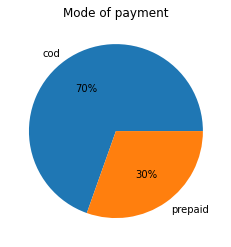

In [207]:
y_.plot.pie(autopct = '%0.f%%')
plt.title('Mode of payment')
plt.axis('off')

##### Q11: Who is the busiest vendor based on number of supplies done?

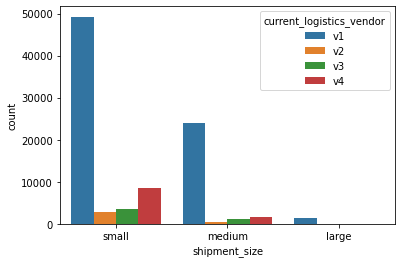

In [208]:
sns.countplot(x = 'shipment_size', data = supply_network, hue = 'current_logistics_vendor')